# Final Project - Modeling

DUE: April 30, 2024 (Tue)  
Pair Programming: Optional, but highly encouraged  
Name(s): Harrison Halesworth 
Class: CSCI 349 - Intro to Data Mining  
Section: 01-11am
Semester: Spring 2024  
Instructors: Brian King, Joshua Stough

**To be interpreted as a PDF and submitted on Gradescope!

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from keras import Input, Model
from keras.layers import Dense, Activation
from keras.optimizers import Adam, SGD
from tensorflow.keras.losses import categorical_crossentropy
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from keras.activations import relu, tanh
from imblearn.over_sampling import SMOTE

## Introduction

The problem I am addressing is the diagnosis of Diabetes on hospital patients and trying to use other measured medical data for individual patients to try and understand which are good indicators of Diabetes diagnosis in the future. I am interested in this topic because I myself have Diabetes and even though I ended up being diagnosed with Type 1 Diabetes in my infancy due to genetic predisposure, I am still very interested in what types of things can lead to the dreaded onset Diabetes, Type 2 Diabetes.

The data I am using to evaluate this problem is from the labs results of "The Specializes Center for Endocrinology and Diabetes-Al-Kindy Teaching Hospital" and it consists of around 1000 instances that are meant to be individual patients, and there are are 12 features in the dataset including the target variable, the diagnosis, which consists of Y, N, or P which is yes, no or pre-diabetic. The other features included are Gender, Age, Urea (Urea is a waste product formed in the liver when the body breaks down proteins, and it is excreted by the kidneys through urine), Creatinine Ratio (The creatinine ratio, often referred to as the urine creatinine-to-serum creatinine ratio, is a measure used to assess kidney function and detect abnormalities in the urinary system), HBA1C (HbA1c, also known as glycated hemoglobin or hemoglobin A1c provides an indication of a person's average blood sugar levels over the past 2-3 months), Cholesterol, Triglycerides (Triglycerides are a type of fat (lipid) found in your blood. When you eat, your body converts any calories it doesn't need to use right away into triglycerides. The triglycerides are stored in your fat cells. Later, hormones release triglycerides for energy between meals), HDL Cholesterol ("good" cholesterol), LDL Cholesterol ("bad" cholesterol), VLDL ("really bad" cholesterol), and Body Mass Index (compares weight to height and indicates how appropriate the weight is for that height).

I speculate that age, BMI, and VLDL will have a positive correlation with Positive diagnoses, as typically older and unhealthier people are at higher risk of Diabetes.

## Data

In [2]:
df = pd.read_csv('C:\\Users\\hhale\\csci349_2024sp\\project\\data\\diabetes.csv')
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


"The data were collected from the Iraqi society, as they data were acquired from the laboratory of Medical City Hospital and (the Specializes Center for Endocrinology and Diabetes-Al-Kindy Teaching Hospital). Patients' files were taken and data extracted from them and entered in to the database to construct the diabetes dataset. The data consist of medical information, laboratory analysis." Taken directly from the dataset download page

In [3]:
df.shape

(1000, 14)

The dataset has 1000 observations and 14 variables, including one target variable. The attributes are explained in the introduction.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [5]:
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


## Data Preparation

In [6]:
df["CLASS"].value_counts()

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

For some reason the Y and P categories of this target variable are repeated, so I will combine them down.

In [7]:
df["CLASS"] = df["CLASS"].str.upper()
df["CLASS"] = df["CLASS"].str.strip()
df['CLASS'] = pd.Categorical(df['CLASS'])
df["CLASS"].value_counts()

CLASS
Y    844
N    103
P     53
Name: count, dtype: int64

Fixed! Now let's look at the other categorical attribute, gender.

In [8]:
df["Gender"].value_counts()

Gender
M    565
F    434
f      1
Name: count, dtype: int64

Good thing we looked, there seems to be an improper entry! Let's fix that

In [9]:
df["Gender"] = df["Gender"].str.upper()
df["Gender"] = df["Gender"].str.strip()
df["Gender"] = pd.Categorical(df["Gender"])
df["Gender"].value_counts()

Gender
M    565
F    435
Name: count, dtype: int64

Let's take a look and make sure that the ID attribute properly represents separate patients and/or observations.

In [10]:
not_repeated = df["ID"].value_counts()[df["ID"].value_counts() < 2]
not_repeated

ID
522    1
638    1
541    1
480    1
481    1
      ..
353    1
356    1
488    1
508    1
248    1
Name: count, Length: 600, dtype: int64

In [11]:
repeated = df["ID"].value_counts()[df["ID"].value_counts() > 1]
repeated

ID
76     2
108    2
57     2
26     2
69     2
      ..
150    2
49     2
144    2
145    2
147    2
Name: count, Length: 200, dtype: int64

OK, there are 200 repeated IDs and therefore 400 observations that don't have unique IDs, is this intentional? Let's look at some observations with identical IDs.

In [12]:
for ID in repeated.head().index:
    print(df[df["ID"]==ID])
    print("\n")

     ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
249  76       9903      M   73   4.3  79    6.0   5.3  1.4  1.5  3.2   0.6   
910  76       8978      M   60   5.4  64   10.4   3.8  1.5  0.8  2.3   0.6   

      BMI CLASS  
249  27.0     Y  
910  31.0     Y  


      ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
183  108      24007      M   38   4.0  67   10.2   5.2  2.0  1.1  3.2  14.0   
933  108      24345      M   51   2.5  55   13.0   6.3  7.2  1.2  3.3   2.8   

      BMI CLASS  
183  47.0     Y  
933  35.0     Y  


     ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
165  57      23990      M   35   4.8  64    7.7   3.7  1.0  1.2  2.0   7.2   
894  57       6544      M   54   3.0  67    7.0   4.8  1.7  1.3  2.8   0.7   

      BMI CLASS  
165  27.3     Y  
894  26.0     Y  


     ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
748  26      34520      M   60   7.5  83    7.

Due to some IDs being repeated despite representing different patients, I will just be removing the variable altogether and identify observations with dataframe indeces. I guarantee this will have minimal impact on the analysis.

In [13]:
df = df.drop("ID", axis=1)
df.head()

,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


The variable No_Pation which I believe is supposed to be the patient number is also completely useless here as there are multiple repeats describing two different patients and a specific number that occurs 19 times, so I will also be stripping that variable as well. Again, I don't foresee this impacting analysis at all.

In [14]:
df["No_Pation"].value_counts()

No_Pation
454316    19
856        2
87654      2
71741      2
34290      2
          ..
34342      1
3275       1
34343      1
23973      1
24054      1
Name: count, Length: 961, dtype: int64

In [15]:
df[df["No_Pation"]==454316]

,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
96,454316,F,54,6.3,106,5.6,4.3,2.0,1.3,2.2,0.9,20.0,N
97,454316,F,50,3.3,70,4.9,3.7,0.9,1.2,2.7,0.6,24.0,N
98,454316,M,60,7.5,70,0.9,3.4,5.3,1.1,3.6,0.8,24.0,N
99,454316,M,77,5.0,106,5.4,0.0,2.8,0.8,1.8,0.7,19.0,N
100,454316,F,59,4.7,58,4.1,4.5,1.8,1.8,1.8,1.3,22.5,N
101,454316,F,57,4.6,97,0.9,3.2,1.3,0.9,3.0,1.1,22.0,N
981,454316,M,65,5.0,97,7.0,4.3,4.3,1.4,1.5,2.0,27.0,Y
982,454316,F,54,5.0,88,6.8,5.1,2.1,1.1,3.0,1.0,30.0,Y
983,454316,M,64,8.8,106,8.5,5.9,2.1,1.2,4.0,1.2,32.0,Y
984,454316,F,60,5.0,70,8.1,5.2,3.3,1.4,0.6,3.0,27.0,Y


Let's remove it here.

In [16]:
df = df.iloc[:, 1:]
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


Let's do some renaming of the attributes for consistency (Acronyms all caps, otherwise not)

In [17]:
df = df.rename(columns={"AGE": "Age", "Urea": "UREA", "Cr": "CR", "HbA1c": "HBA1C", "Chol": "CHOL", "CLASS": "Target"})
df.head()

,Gender,Age,UREA,CR,HBA1C,CHOL,TG,HDL,LDL,VLDL,BMI,Target
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


To finish off the data preparation, I would like to include and show the distributions of the attributes so we can get an idea of the data we are working with.

### Target Distribution

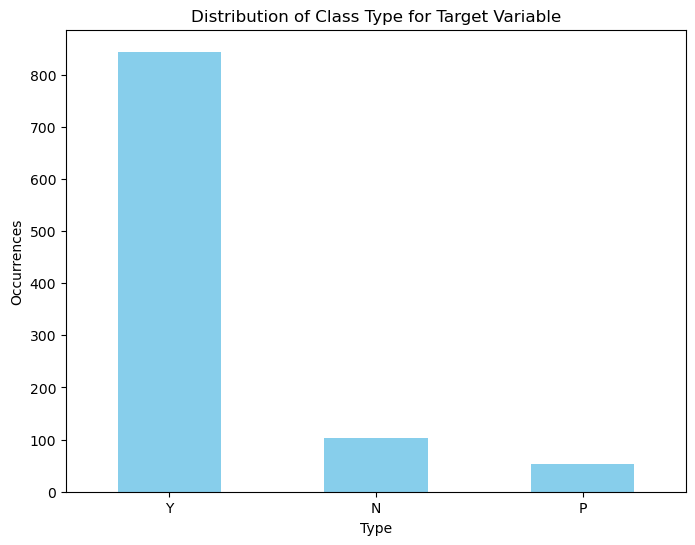

In [18]:
plt.figure(figsize=(8, 6))
df["Target"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribution of Class Type for Target Variable")
plt.xlabel("Type")
plt.ylabel("Occurrences")
plt.xticks(rotation=0)
plt.show()

### Gender Distribution

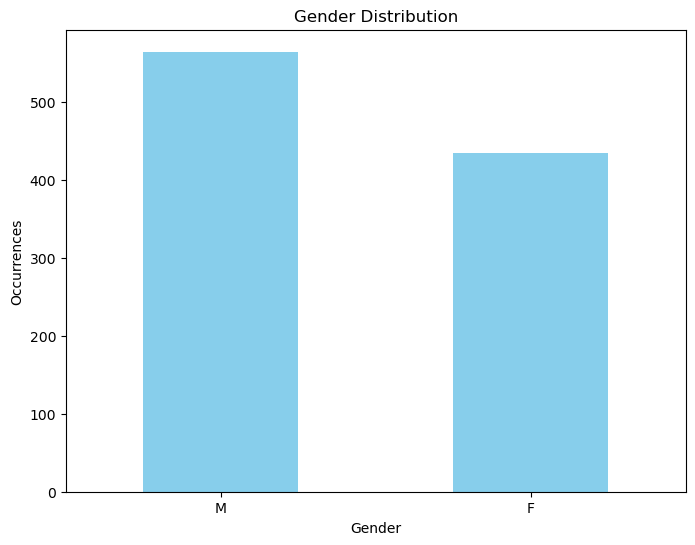

In [19]:
plt.figure(figsize=(8, 6))
df["Gender"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Occurrences")
plt.xticks(rotation=0)
plt.show()

### Age Distribution

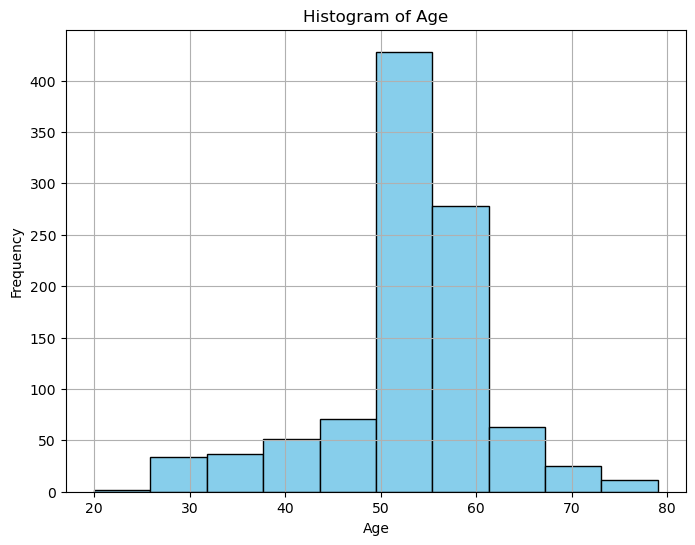

In [20]:
plt.figure(figsize=(8, 6))
plt.hist(df["Age"], bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### Health Metrics Disributions

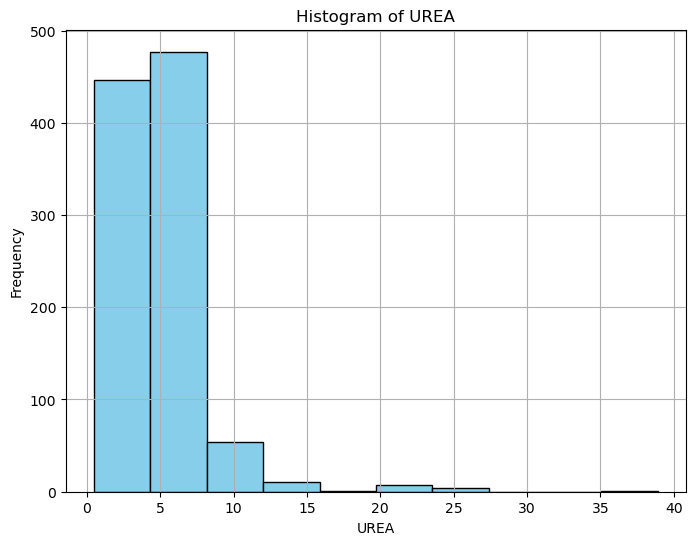

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(df["UREA"], bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of UREA")
plt.xlabel("UREA")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

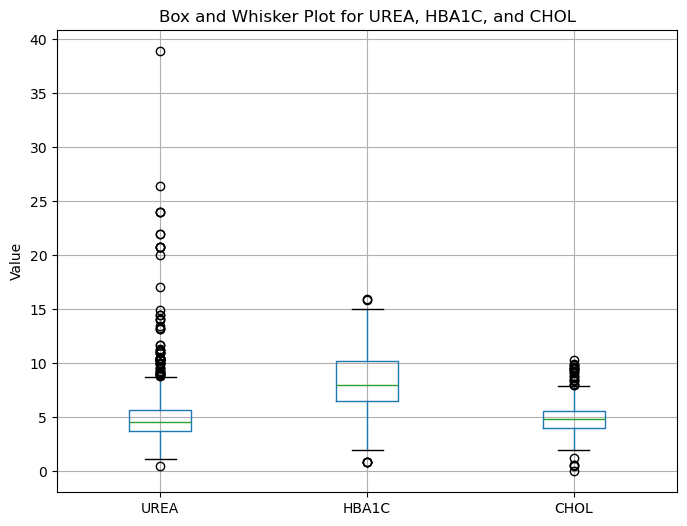

In [22]:
plt.figure(figsize=(8, 6))
df.boxplot(column=["UREA", "HBA1C", "CHOL"])
plt.title("Box and Whisker Plot for UREA, HBA1C, and CHOL")
plt.ylabel("Value")
plt.show()

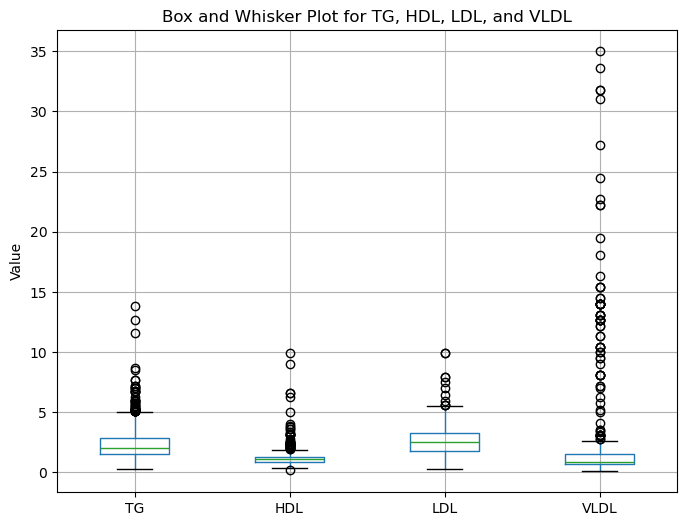

In [23]:
plt.figure(figsize=(8, 6))
df.boxplot(column=['TG', 'HDL', 'LDL', 'VLDL'])
plt.title('Box and Whisker Plot for TG, HDL, LDL, and VLDL')
plt.ylabel('Value')
plt.show()

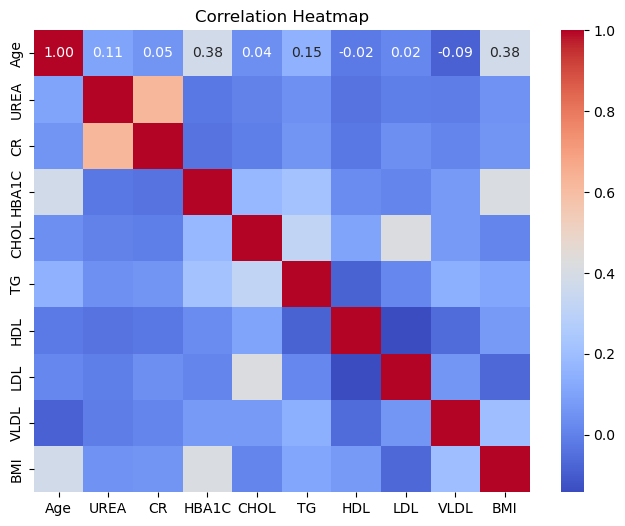

In [24]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Value Averages per Target Class

In [25]:
tmp = df.drop("Gender", axis=1)
means = tmp.groupby("Target", observed=False).mean()
means

,Age,UREA,CR,HBA1C,CHOL,TG,HDL,LDL,VLDL,BMI
Target,,,,,,,,,,
N,44.233010,4.680583,62.796117,4.560194,4.268932,1.625243,1.227184,2.625243,0.943689,22.374757
P,43.283019,4.511321,66.075472,6.003774,4.579245,2.126415,1.127358,2.493396,0.983019,23.933962
Y,55.305687,5.217468,69.873223,8.878270,4.953104,2.452026,1.206872,2.615213,2.020616,30.811517


Now let's take a look at our fully prepared dataframe before we begin modeling.

In [26]:
df.head()

,Gender,Age,UREA,CR,HBA1C,CHOL,TG,HDL,LDL,VLDL,BMI,Target
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


Looking at the distributions of the attributes as well as the dataset overall, there are a couple of takeaways

    - There is a clear class imbalance as there are over 800 instances with the target variable belonging to class Y, around 100 with N and around 50 with P. I will look to use modeling methods that are not sensitive to class imbalance and potentially use under or over sampling to deal with it as well.

    - The number of instances is not ideal for more in depth machine learning as there are only 1000 observations. It will be a challenge to effectively separate and choose training versus test data with so few observations and avoid overfitting.

    - Most of the patients in the study are age 50 and up, and so that explains the majority inclusion of positive diagnoses in the data, and portrays a bias built into the dataset.

## Modeling

For my modeling portion of the project, I chose a couple of classifying methods that I thought would work best for my circumstances, and I also used grid search to try and tune hyperparameters of some of these methods to better fit the data. I began by using some ensemble methods to try and deal with the class imbalance, so I used random forest, and gradient boosting to begin. I then did a gridsearch to try and find the optimal hyperparameters to pair with these ensemble methods, but unfortunately the best performances in the grid search results for both were inferior to the classifiers with default hyperparameters. After this, I attempted to utilize oversampling using SMOTE (Synthetic Minority Oversampling Technique) with random forest which gave us our best predictive performance out of all of the considered methods to that point. I then used SMOTE in tandem with gradient boosting, which did not garner superior results, and finally with the decisiion tree classifier, which also did not yield anything special. Below are the cells in which the machine learning is performed.

In [27]:
X = df.drop("Target", axis=1)
y = df["Target"]

In [28]:
X_encoded = pd.get_dummies(X, columns=['Gender'], drop_first=True)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

Using the random forest ensemble classifier to deal with the built-in class imbalance

In [30]:
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)
rf_predictions_train = rf_classifier.predict(X_train)
rf_predictions = rf_classifier.predict(X_test)

print("Random Forest Classifier(train):")
print(classification_report(y_train, rf_predictions_train))

print("Random Forest Classifier(test):")
print(classification_report(y_test, rf_predictions))

Random Forest Classifier(train):
              precision    recall  f1-score   support

           N       1.00      1.00      1.00        82
           P       1.00      1.00      1.00        47
           Y       1.00      1.00      1.00       671

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Random Forest Classifier(test):
              precision    recall  f1-score   support

           N       0.95      0.95      0.95        21
           P       1.00      1.00      1.00         6
           Y       0.99      0.99      0.99       173

    accuracy                           0.99       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.99      0.99       200



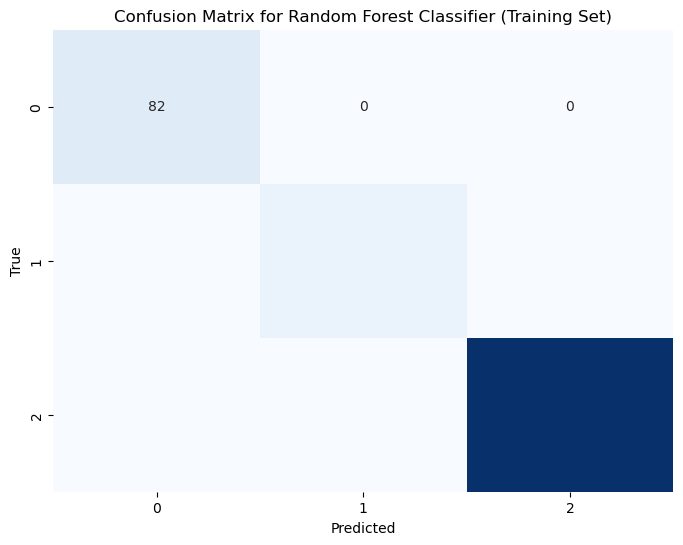

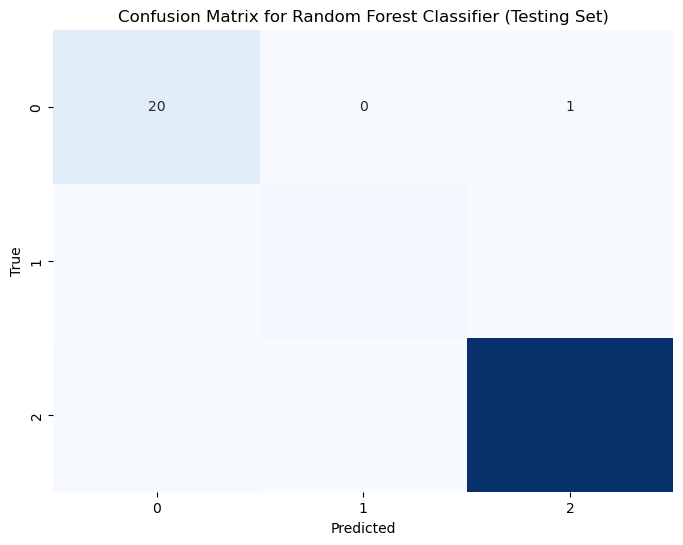

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_train, rf_predictions_train), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Random Forest Classifier (Training Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Random Forest Classifier (Testing Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Using the gradient boosting classifier to deal with the built-in class imbalance

In [32]:
gb_classifier = GradientBoostingClassifier(random_state=0)
gb_classifier.fit(X_train, y_train)
gb_predictions_train = gb_classifier.predict(X_train)
gb_predictions = gb_classifier.predict(X_test)

print("\nGradient Boosting Classifier(train):")
print(classification_report(y_train, gb_predictions_train))

print("\nGradient Boosting Classifier(test):")
print(classification_report(y_test, gb_predictions))


Gradient Boosting Classifier(train):
              precision    recall  f1-score   support

           N       1.00      1.00      1.00        82
           P       1.00      1.00      1.00        47
           Y       1.00      1.00      1.00       671

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Gradient Boosting Classifier(test):
              precision    recall  f1-score   support

           N       0.95      0.90      0.93        21
           P       1.00      1.00      1.00         6
           Y       0.99      0.99      0.99       173

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.98      0.98       200



As you can see both ensemble classification techniques performed very similarly, both nearing 100% accuracy. Let's see if we can try and use grid search to try and perfect performance on the test data.

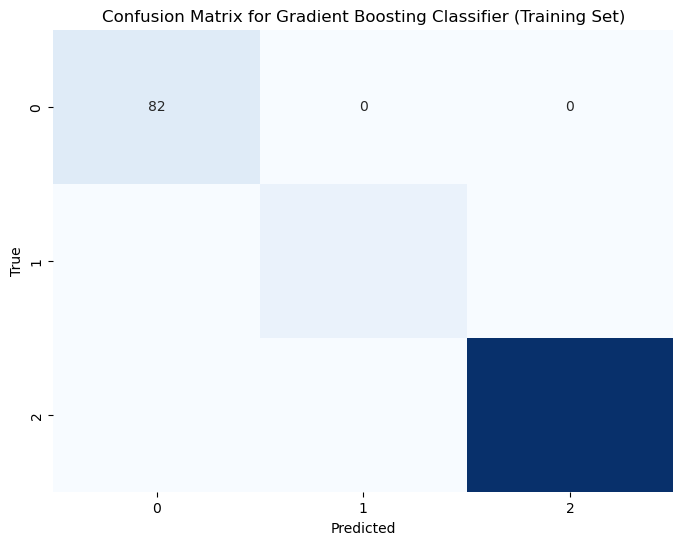

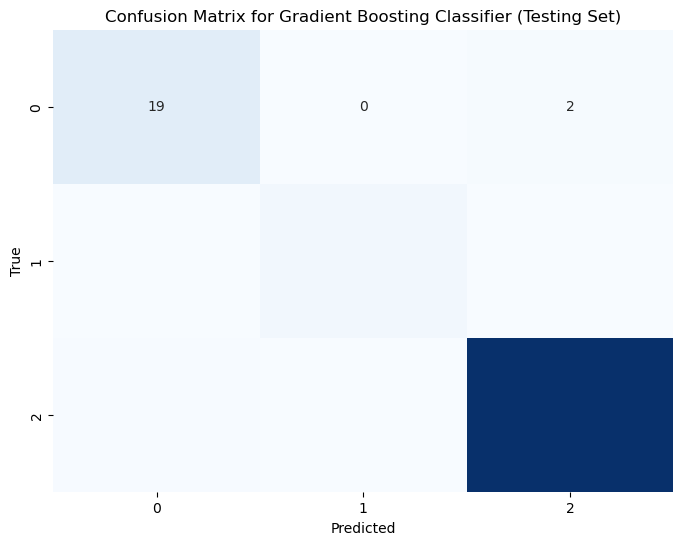

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_train, gb_predictions_train), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Gradient Boosting Classifier (Training Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, gb_predictions), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Gradient Boosting Classifier (Testing Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [34]:
%%time

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

best_rf_model = rf_grid_search.best_estimator_
rf_predictions = best_rf_model.predict(X_test)

print("Best Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Random Forest Classifier:
              precision    recall  f1-score   support

           N       0.95      0.95      0.95        21
           P       1.00      1.00      1.00         6
           Y       0.99      0.99      0.99       173

    accuracy                           0.99       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.99      0.99       200

CPU times: total: 4.75 s
Wall time: 1min 16s


In [35]:
%%time

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=0), param_grid=gb_param_grid, cv=5, n_jobs=-1, verbose=2)
gb_grid_search.fit(X_train, y_train)

best_gb_model = gb_grid_search.best_estimator_
gb_predictions = best_gb_model.predict(X_test)

print("\nBest Gradient Boosting Classifier:")
print(classification_report(y_test, gb_predictions))

Fitting 5 folds for each of 486 candidates, totalling 2430 fits

Best Gradient Boosting Classifier:
              precision    recall  f1-score   support

           N       0.95      0.95      0.95        21
           P       1.00      1.00      1.00         6
           Y       0.99      0.99      0.99       173

    accuracy                           0.99       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.99      0.99       200

CPU times: total: 24.4 s
Wall time: 18min 27s


In [36]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train_resampled, y_train_resampled)
rf_predictions = rf_classifier.predict(X_test)

In [37]:
print("Random Forest Classifier with SMOTE:")
print(classification_report(y_test, rf_predictions))

Random Forest Classifier with SMOTE:
              precision    recall  f1-score   support

           N       0.95      1.00      0.98        21
           P       1.00      1.00      1.00         6
           Y       1.00      0.99      1.00       173

    accuracy                           0.99       200
   macro avg       0.98      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



Using SMOTE in tandem with random forests gave us our best performance so far, let's try it with gradient boosting now.

In [38]:
gb_classifier = GradientBoostingClassifier(random_state=0)
gb_classifier.fit(X_train_resampled, y_train_resampled)
gb_predictions = gb_classifier.predict(X_test)

print("\nGradient Boosting Classifier with SMOTE:")
print(classification_report(y_test, gb_predictions))


Gradient Boosting Classifier with SMOTE:
              precision    recall  f1-score   support

           N       0.95      1.00      0.98        21
           P       0.86      1.00      0.92         6
           Y       1.00      0.99      0.99       173

    accuracy                           0.99       200
   macro avg       0.94      1.00      0.96       200
weighted avg       0.99      0.99      0.99       200



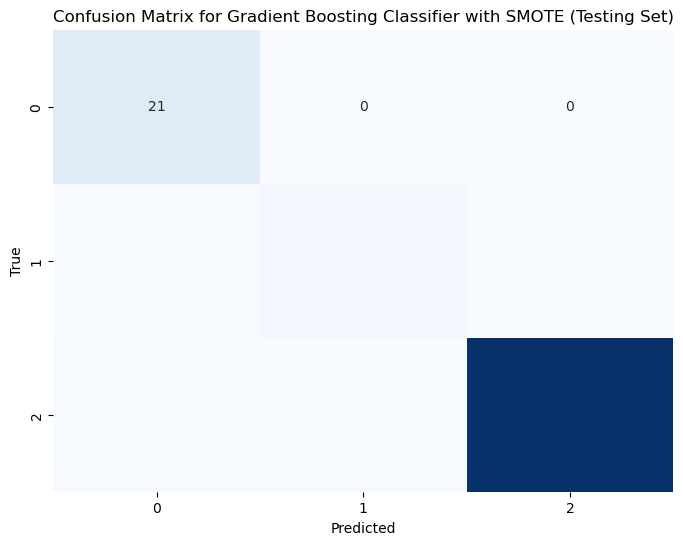

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, gb_predictions), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Gradient Boosting Classifier with SMOTE (Testing Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Now let's just try a simple decision tree classifier with SMOTE

In [40]:
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train_resampled, y_train_resampled)
dt_predictions = dt_classifier.predict(X_test)

print("\nDecision Tree Classifier with SMOTE:")
print(classification_report(y_test, dt_predictions))


Decision Tree Classifier with SMOTE:
              precision    recall  f1-score   support

           N       0.95      0.95      0.95        21
           P       0.86      1.00      0.92         6
           Y       0.99      0.99      0.99       173

    accuracy                           0.98       200
   macro avg       0.93      0.98      0.96       200
weighted avg       0.99      0.98      0.99       200



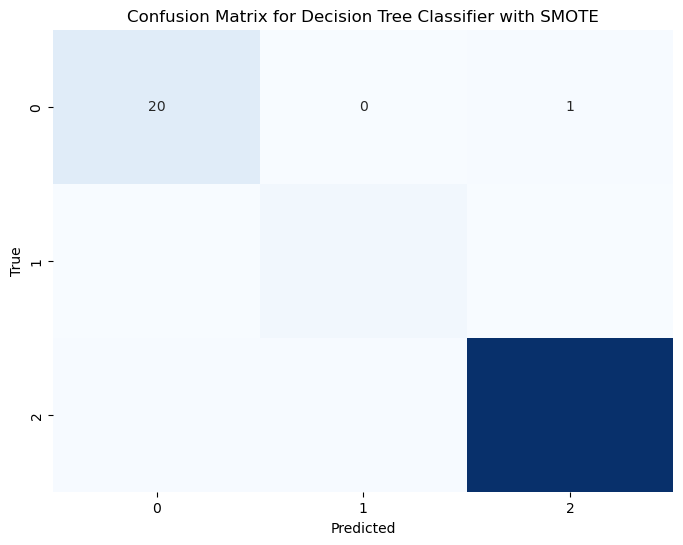

In [41]:
conf_matrix = confusion_matrix(y_test, dt_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Decision Tree Classifier with SMOTE")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Performance Results

As I mentioned before, the random forest classifier in tandem with SMOTE yielded the best predictive results for this dataset. I will show the predictive results as well as some visual tools to provide further context to these results.

In [42]:
print("Random Forest Classifier with SMOTE:")
print(classification_report(y_test, rf_predictions))

Random Forest Classifier with SMOTE:
              precision    recall  f1-score   support

           N       0.95      1.00      0.98        21
           P       1.00      1.00      1.00         6
           Y       1.00      0.99      1.00       173

    accuracy                           0.99       200
   macro avg       0.98      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



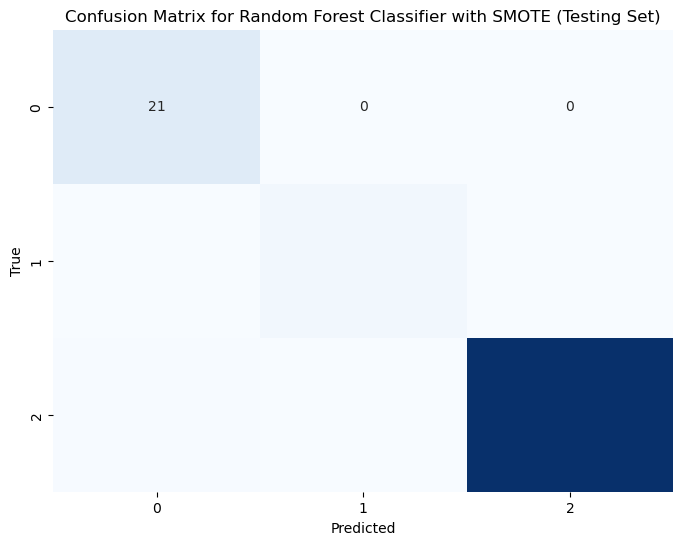

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Random Forest Classifier with SMOTE (Testing Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

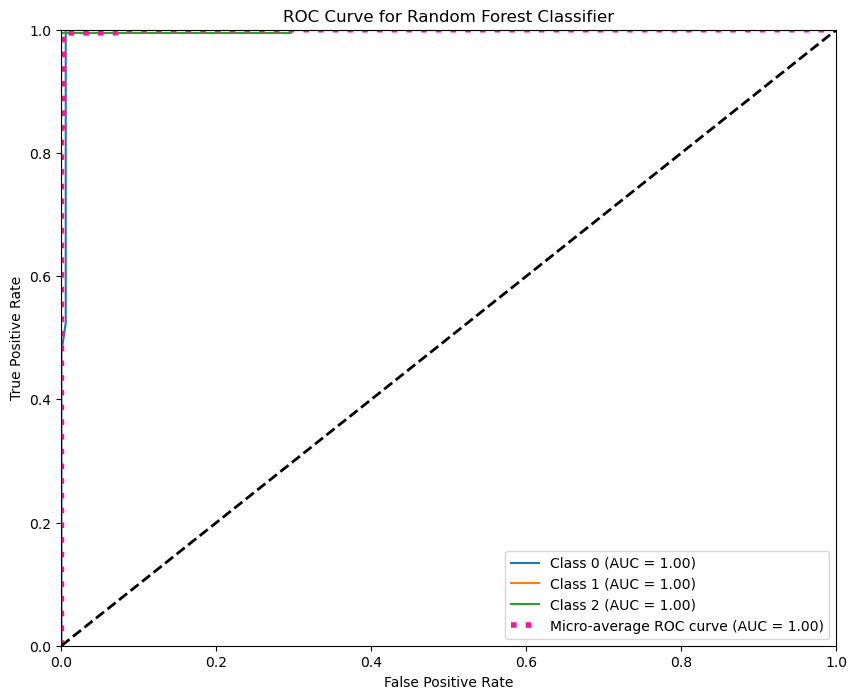

In [44]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
rf_probs = rf_classifier.predict_proba(X_test)

n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], rf_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), rf_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], "k--", linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest Classifier")
plt.legend(loc="lower right")
plt.show()

In [45]:
feature_importances = rf_classifier.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

for i, idx in enumerate(sorted_indices):
    print(f"Feature {i+1}: {X_encoded.columns[idx]} - Importance: {feature_importances[idx]}")

Feature 1: HBA1C - Importance: 0.48695168929957183
Feature 2: BMI - Importance: 0.23319777851248122
Feature 3: Age - Importance: 0.12837476310387821
Feature 4: TG - Importance: 0.03750755982920709
Feature 5: CHOL - Importance: 0.028282084131668214
Feature 6: VLDL - Importance: 0.020024171484822453
Feature 7: LDL - Importance: 0.019066668475428802
Feature 8: UREA - Importance: 0.016289931750724584
Feature 9: CR - Importance: 0.013388814140212403
Feature 10: HDL - Importance: 0.009588575990086473
Feature 11: Gender_M - Importance: 0.007327963281918843


## Discussion

To begin this discussion I would like to point out that most of the difficulty surrounding this project stemmed from my poor choice in dataset. The dataset was relatively clean and ready for modeling usage but the class imbalance and low number of observations makes it challenging for me or anyone to say whether the model would predict accurately with a more balanced dataset featuring the same variables and features, and that is an important thing to consider as the chosen patients for the research/experiment clearly occupied a certain demographic (older, generally unhealthy) and probably already had begun the process of screening for Diabetes prior to participating in the research, hence why over 80% of the observations resulted in positive diagnoses. For future considerations I would look for a dataset with similar features but more observations and a more balanced representation for the target class. This caveat to the dataset though allowed me to experiment with classifiers and techniques that I was unfamiliar with like random forest and gradient boosting, as well as SMOTE, which we just recently learned about in class luckily. Something that I found surprising about the project was the futility of using gridsearch with random forest and gradient boosting, I did not expect the default parameters to perform the best but I guess sometimes tuning frankly isn't necessary, as generic random forest classifier with SMOTE was able to achieve an area under the ROC curve of 1 for all three classes. Another thing I found surprising was the importance of certain features, as I predicted that Age, BMI and VLDL would be the most connected to the diagnosis, but HBA1C was by far the most important followed by Age and BMI. 

## Conclusions

Overall, as expected age and BMI are some of the leading variables in determining the diagnosis for Diabetes but there is one feature that is above them both: HBA1C. I actually know what an A1C calculation is as I have the testing done for it on me every 6 months when I go to the endocrinologist and essentially it tells you how high or low your blood sugar has been on average over the past 2-3 months. For example, typical range is from 5 aall the way up to 12 where 5 is an average blood sugar of 97 mg/dL, 6 is 126 mg/dL, 7 is 154 mg/dL, 8 is 183 mg/dL, ... 12 is 298 mg/dL. This is a reading of interest because individuals with Diabetes either have a nonfunctioning pancreas that can't produce insulin like myself or are insulin resistant and need to inject more insulin or take medication to mitigate the resistance, so people with untreated Diabetes will naturally have a higher HBA1C as the glucose in their bloodstream is not metabolized due to lack of insulin and contrarily individuals with a healthy pancreas and no issues concerning insulin absorption will have a lower HBA1C as the glucose in their blood is properly metabolized. Knowing this, we can now understand why HBA1C is of utmost importance of all features when it comes to determining the Diabetes diagnosis of a patient. Other than that, age and BMI are undeniably the best indicators of the remaining features, which also makes sense because as you get older your metabolism slows down and other hormones are altered as well which can lead to insulin resistance outright and BMI is generally a good at-a-glance metric to determine how appropriate an individual's weight is compared to their height, and as you become more overweight your metabolism and hormones change and with a higher fat to muscle ratio, glucose metabolism also deteriorates, leading to insulin resistance. Due to the dataset being relatively small and containing some very indicative features related to the target variable, the combination of SMOTE and a generic random forest classifier was able to predict the Diabetes diagnosis of patients to a very high degree based on the rest of the available health data and the aforementioned features. This model effectively mitigated the potential issues that class imbalance would otherwise have on performance through oversampling and the use of an ensemble classifier, which was also an expected outcome.